# Problem rezystorów 1

### Naszym celem jest takie dobranie rezystorów, aby wydzielona na nich moc była jak najmniejsza na podstawie poniższych danych:
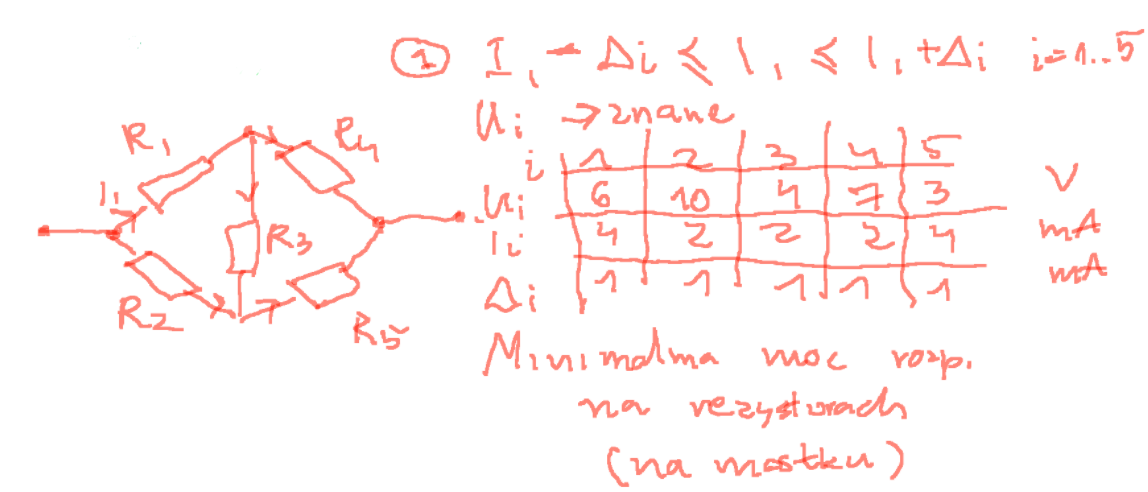

In [1]:
from pulp import *

In [90]:

prob = LpProblem("Moc na mostku",LpMinimize)
I1=LpVariable("I1",0)
I2=LpVariable("I2",0)
I3=LpVariable("I3",0)
I4=LpVariable("I4",0)
I5=LpVariable("I5",0)
U = [6,10,4,7,3]
prob += U[0]*I1 + U[1]*I2 + U[2]*I3 + U[3]*I4 + U[4]*I5
prob += I1 == I3+I4
prob += I2 == I5-I3

prob += I1 >= 3 
prob += I1 <= 5
prob += I2 >= 1
prob += I2 <= 3
prob += I3 >= 1
prob += I3 <= 3
prob += I4 >= 1
prob += I4 <= 3
prob += I5 >= 3
prob += I5 <= 5

prob.writeLP("moc_rezystory.lp")
prob.solve()
a=0
rezo={}
prady={}
for x in prob.variables():
    rezo["R"+str(a+1)] = U[a]/x.varValue
    prady[x.name] = x.varValue
    a =a + 1
 
 
print("Status:", LpStatus[prob.status])
print("Moc minimalna: {}W".format(value(prob.objective)))
print("Rezystancje: {}".format(rezo))
print("Prądy: {}".format(prady))

Status: Optimal
Moc minimalna: 52.0W
Rezystancje: {'R1': 2.0, 'R2': 10.0, 'R3': 2.0, 'R4': 7.0, 'R5': 1.0}
Prądy: {'I1': 3.0, 'I2': 1.0, 'I3': 2.0, 'I4': 1.0, 'I5': 3.0}
